In [18]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Measures of Center(Averages) for a Numerical Variable # 

## Mean vs Median ##

- Mean – The average or mean of a collection of numbers is the sum of all the elements of the collection, divided by the number of elements in the collection.
- Median - is the “middle value”, but it does not have to be one of the observed values.  In order to find the median, the data must be in order first


**Motivating thoughts:**

Suppose that in a small town of 50 people, one person earns $\$5,000,000$ per year and the other 49 earn $30,000 per year. Intuitively, what would you say us the typical of a town resident? Determine both the mean and the median.  

In [19]:
salary = np.append(5_000_000, np.repeat(30_000, 49))
salary

np.mean(salary), np.median(salary)

(129400.0, 30000.0)

Which (the mean or the median) is the better measure of center (or) of the yearly earnings of the town residents?  Why do you so answer?



In [20]:
values = make_array(2, 3, 3, 9)

In [21]:
sum(values)/len(values)

4.25

In [22]:
np.average(values)

4.25

In [23]:
np.mean(values)

4.25

In [24]:
(2 + 3 + 3 + 9)/4

4.25

Conceptual thought about the mean: When we calculate the mean, each distinct value in the collection is weighted by the proportion of times it appears in the collection.

In [25]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [26]:
top_values = make_array(1, 2, 2, 3, 3, 3, 4, 4, 10)
bottom_values = make_array(1, 2, 2, 3, 3, 3, 4, 4, 5)

values_table = Table().with_columns(
    'top_values', top_values,
    'bottom_values', bottom_values
)

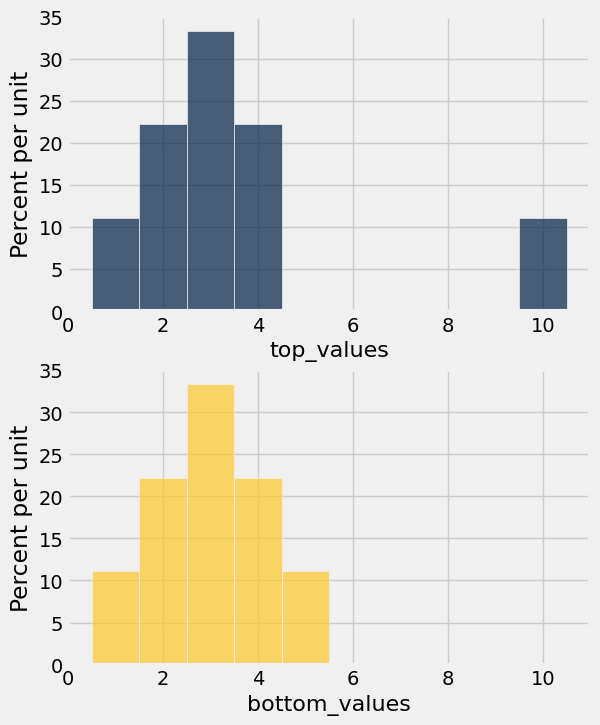

In [27]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('top_values', 'bottom_values', bins = bins_for_display, overlay = False)

In [28]:
np.mean(top_values), np.median(top_values)

(3.5555555555555554, 3.0)

In [29]:
np.mean(bottom_values), np.median(bottom_values)

(3.0, 3.0)

## Defining Variability:  Measures of Spread for a Numerical Variable 

**Standard Deviation**: The standard deviation is useful when considering how far the data are distributed from the mean.

The standard deviation represents the typical deviation of observations from the mean, especially for a unimodal, symmetric distribution. The standard deviation is computed numerically using the formula 
$$
\sigma=\sqrt{\frac{\sum(x-\mu)^2}{N}}
$$

- Always positive or zero
- A small standard deviation occurs when the data values are all concentrated close to the mean, i.e. less variation.
- A larger standard deviation occurs when the data values are more spread out from the mean, i.e. more variation


We consider an example below of how to hard-code the standard deviation of a set of values called `bottom values`

In [30]:
bottom_values_table = Table().with_columns(
    'bottom values', bottom_values,
    'mean of bottom values', np.repeat(np.mean(bottom_values), len(bottom_values)),
    'deviation from mean', bottom_values - np.mean(bottom_values)
)

bottom_values_table

bottom values,mean of bottom values,deviation from mean
1,3,-2
2,3,-1
2,3,-1
3,3,0
3,3,0
3,3,0
4,3,1
4,3,1
5,3,2


In [31]:
sum(bottom_values_table.column('deviation from mean')) / bottom_values_table.num_rows

0.0

In [32]:
sum((bottom_values_table.column('deviation from mean')) ** 2 ) / bottom_values_table.num_rows

1.3333333333333333

In [33]:
(sum((bottom_values_table.column('deviation from mean')) ** 2 ) / bottom_values_table.num_rows) ** 0.5

1.1547005383792515

In [34]:
np.std(bottom_values)

1.1547005383792515

In [35]:
np.std(top_values)

2.4545246704860579

**Interquartile Range**: The positive difference between the 25th percentile(also called the lower/first quartile) and the 75th percentile(also called the upper/third quartile)

Computationally, this is calculated as 

$$
\text { Interquartile range }=\text {75th Percentile - 25th Percentile}=\text { Upper Quartile - Lower Quartile }=Q_3-Q_1
$$

where $Q_1$ is the first quartile and $Q_3$ is the third quartile of the series.

In [36]:
# Compute the Interquartile Range of Bottom Values
# Note: You can use the `percentile` function in the numpy library, e.g. np.percentile(array_name, a number between 0 and 100)


IQR = np.percentile(bottom_values, 75) - np.percentile(bottom_values, 25)
IQR

2.0

In [37]:
# Or the percentile function in the datascience module we are using in this class,
# e.g. percentile(a number between 0 and 100, array_name)

datascience_IQR = percentile(75, bottom_values) - percentile(25, bottom_values)
datascience_IQR

2

- The median and IQR are called robust statistics because extreme observations have little effect on their values.

- On the other hand, the mean and standard deviation are more heavily influenced by changes in extreme observations, which can be important in some situations.

## Chebyshev's Bound ## 

Specifically, at least $1 - \dfrac{1}{k^2}$ of the distribution's values are less than $k$ standard deviations away from the mean. 

The rule is often called Chebyshev's theorem, about the range of standard deviations around the mean, in statistics. 

The inequality has great utility because it can be applied to ANY probability distribution in which the mean and variance are defined. 

In [38]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')
births.take(np.arange(3))

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
120,284,27,62,100
113,282,33,64,135
128,279,28,64,115


- Can you describe the shape of the histograms of each of the following numerical variables?

- What measure of center and spread would you recommend for each of the variables?

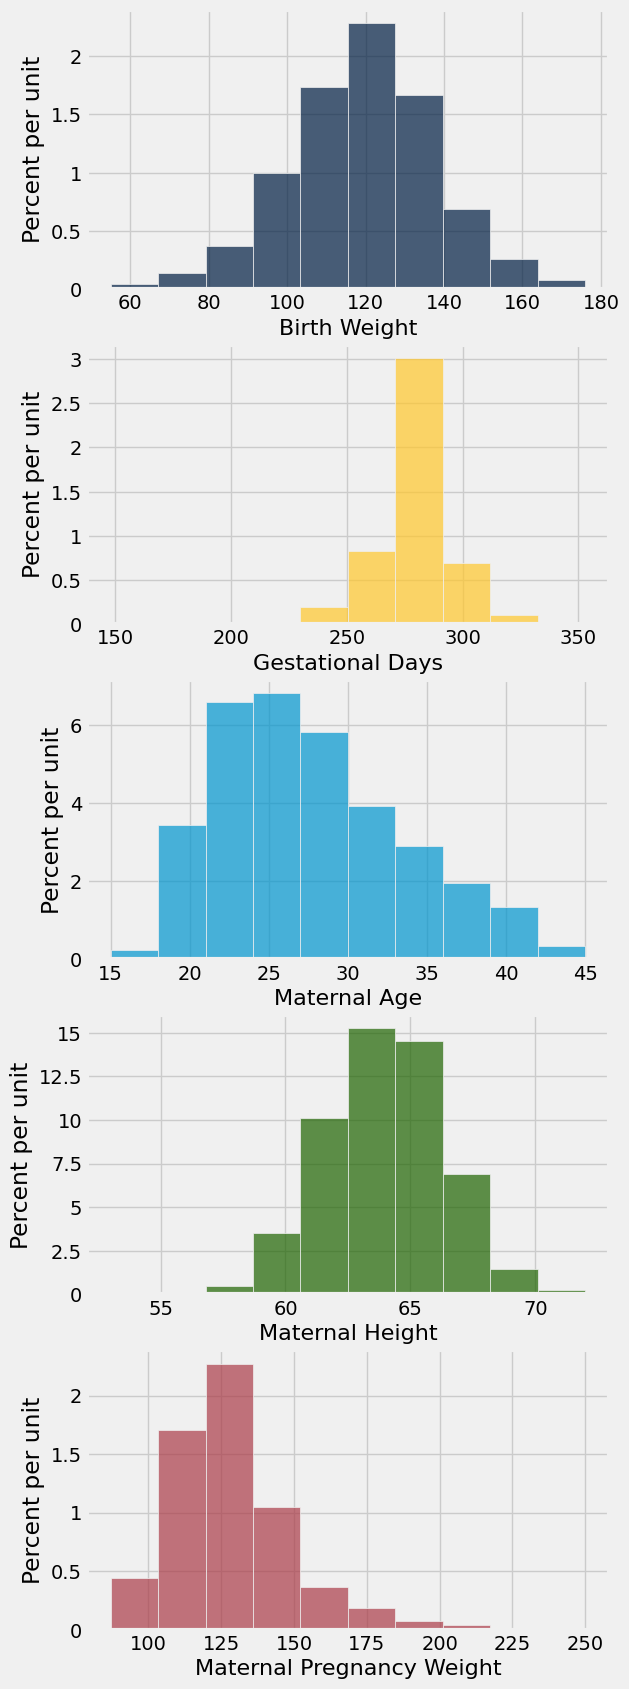

In [39]:
births.hist(overlay = False)

In [40]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
iqr = np.percentile(mpw, 0.75) - np.percentile(mpw, 0.25)
mean, sd, iqr

(128.4787052810903, 20.725449704280411, 3.0674999999999955)

Chebyshev's Theorem's states that for ANY data set, no matter what the distribution of the data is:

- At least 75% of the data is within two standard deviations of the mean.
- At least 88.89% of the data is within three standard deviations of the mean.
- At least 93.75% of the data is within 4.5 standard deviations of the mean.


Can we prove this using the dat set we have?

In [41]:
# Chebyshev's bound: 
# We can compute the proportions above using Python when k =  3, for example.

1 - 1/(3**2)

0.8888888888888888

In [42]:
within_3_SDs = births.where('Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [43]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [44]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

In [45]:
# See if Chebyshev's bounds work for distributions with various shapes

for variable in births.labels:
    values = births.column(variable)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(variable)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(variable, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '% of the data')


Birth Weight
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.57 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Gestational Days
Average plus or minus 2 SDs: 93.78 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs: 99.57 % of the data
Average plus or minus 5 SDs: 99.83 % of the data

Maternal Age
Average plus or minus 2 SDs: 94.89 % of the data
Average plus or minus 3 SDs: 99.91 % of the data
Average plus or minus 4 SDs: 100.0 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Height
Average plus or minus 2 SDs: 97.19 % of the data
Average plus or minus 3 SDs: 99.66 % of the data
Average plus or minus 4 SDs: 99.91 % of the data
Average plus or minus 5 SDs: 100.0 % of the data

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 % of the data
Average plus or minus 3 SDs: 98.64 % of the data
Average plus or minus 4 SDs:

## Standard Units(Also called Z-scores) ##

In [46]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [47]:
ages = births.column('Maternal Age')
ages

array([27, 33, 28, ..., 30, 21, 38])

In [48]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [49]:
both = Table().with_columns(
    'Age in Years', ages,
    'Age in Standard Units', ages_standard_units
)
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [50]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

In [51]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

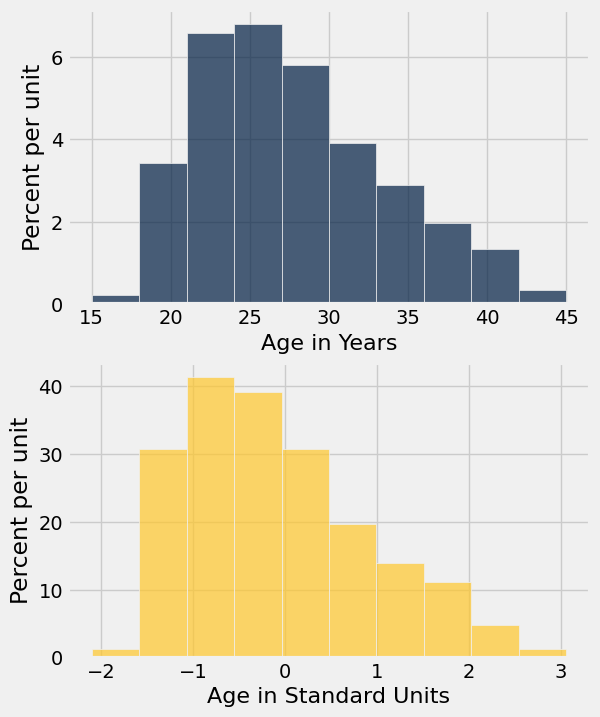

In [52]:
# Draw the histogram of the ages and the histogram of the standard units of ages.
# What did you observe?

both.hist(overlay = False)

In [53]:
# We can use the user-defined standard units to also return the Birth Weights in Standard Units.

both = both.with_columns(
    'Birth Weight', births.column('Birth Weight'),
    'Birth Weight in Standard Units', standard_units(births.column('Birth Weight'))
)

both

Age in Years,Age in Standard Units,Birth Weight,Birth Weight in Standard Units
27,-0.0392546,120,0.029337
33,0.992496,113,-0.352741
28,0.132704,128,0.465998
23,-0.727088,108,-0.625654
25,-0.383171,136,0.902658
33,0.992496,138,1.01182
23,-0.727088,132,0.684328
25,-0.383171,120,0.029337
30,0.476621,143,1.28474
27,-0.0392546,140,1.12099


In [54]:
both.sort('Birth Weight', descending = False)

Age in Years,Age in Standard Units,Birth Weight,Birth Weight in Standard Units
35,1.33641,55,-3.51853
34,1.16445,58,-3.35478
24,-0.55513,62,-3.13645
24,-0.55513,63,-3.08187
31,0.648579,65,-2.9727
24,-0.55513,65,-2.9727
32,0.820537,68,-2.80896
31,0.648579,69,-2.75437
32,0.820537,71,-2.64521
32,0.820537,71,-2.64521


In [55]:
np.mean(both.column('Birth Weight'))

119.46252129471891

In closing...

## The SD and Bell Shaped Curves

The mean and standard deviation are useful measures of center and spread for numerical values having histograms with a bell shape.

Recall that they are more heavily influenced by changes in extreme observations, which can be important in some situations.

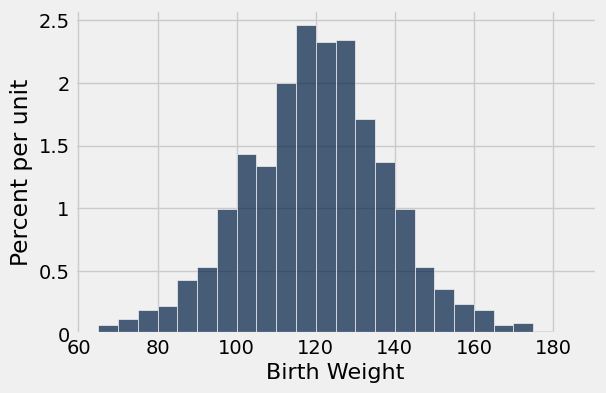

In [56]:
births.hist('Birth Weight', bins = np.arange(65, 190, 5))

In [57]:
birth_weights = births.column('Birth Weight')
np.mean(birth_weights), np.std(birth_weights)

(119.46252129471891, 18.320863702202779)